<a href="https://colab.research.google.com/github/cloudhood/learning-basics/blob/main/notebooks/CV_with_Tensorflow_2_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [CV with Tensorflow 2.x - Part 1](https://learning.oreilly.com/scenarios/computer-vision-training/9781492094401/)

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

# Example 1

In [4]:
# Simple data to learn relationship between bedrooms and prices.
bedrooms = np.array([2, 4, 5, 7, 10, 0])
prices = 50 + bedrooms * 50 + np.random.normal(size=len(bedrooms))

## Build model

In [5]:
# Simplest possible NN with only 1 layer, 1 neuron/node and 1 input,
# with NO hidden layers.
#
# Sequential() defines a model with a sequence or stack of layers
# in a NN. 
# 
# Dense() adds a layer of neurons/nodes
#
# The activation function is unspecified. It will be a LC of the inputs
# by default.
model = tf.keras.Sequential([
    keras.layers.Dense(units=1, input_shape=(1,))
])

## Compile model

In [8]:
# Compile the model - specify a loss and an optimizer.
#
# Loss: measure the guessed answers against the known correct answers.
#       and measure how well or badly it did.
#
# Optimizer: guess the output based on the output of the loss function.
#            tries to minimize the loss.
model.compile(optimizer='sgd', loss='mean_squared_error')

# Fit the model - NN iterative learns the relationship between `bedrooms` 
# and `prices`.
#
# The number of epochs is the number of passes over the entire dataset
# done in order to find the best weights.
model.fit(bedrooms, prices, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 439ms/step - loss: 0.8306
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 0.8305
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 0.8305
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 0.8305
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 0.8305
Epoch 6/100
1/1 [==============================] - 0s 21ms/step - loss: 0.8305
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 0.8304
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 0.8304
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 0.8304
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 0.8304
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 0.8304
Epoch 12/100
1/1 [==============================] - 0s 10ms/step - loss: 0.8303
Epoch 13/100
1/1 [==============================] - 0s

## Prediction

In [9]:
# Kernel = weight associated with the number of bedrooms.
# Bias = constant
# For bedroom = 8, both are quite close to 50.
print("Price of the 8-bedroom house is: ", model.predict([8.0]))
print('Kernel value:', model.weights[0].numpy()[0,0])
print('Bias value:', model.weights[1].numpy()[0])


Price of the 8-bedroom house is:  [[449.03635]]
Kernel value: 49.877716
Bias value: 50.014626


# Example 2

In [10]:
# Bigger NN - add one hidden layer with multiple nodes.
# Classification 
# Real dataset
# Split into train and test.

# For plotting the accuracy and loss over the epochs
import matplotlib.pyplot as plt

# Library that has the dataset built-in
from sklearn.datasets import load_iris

# For splitting our entire data into two parts
from sklearn.model_selection import train_test_split

In [15]:
# Load data
data = load_iris()
X = data['data']
y = data['target']

print('Features of Instance 1:', X[0])
print('Target of Instance 1:', y[0])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2)

# Let's view the shapes of all train and test data.
print('Shape of training data:', X_train.shape)
print('Shape of training targets:', y_train.shape)
print('Shape of test data:', X_test.shape)
print('Shape of test targets:', y_test.shape)

Features of Instance 1: [5.1 3.5 1.4 0.2]
Target of Instance 1: 0
Shape of training data: (120, 4)
Shape of training targets: (120,)
Shape of test data: (30, 4)
Shape of test targets: (30,)


## Build model

In [16]:
# Use a `relu` activation function for the hidden layer. This is a
# popular choice.
#
# Use `softmax` activation function for the output later, as we
# want a probability value for each class.
#
# Use three output nodes, with each output being a value between 0
# and 1, which will add up to 1 due to softmax. Each node will
# indicate the probability of a particular class in the target labels.
model = keras.models.Sequential([
    keras.layers.Dense(units=10, activation='relu', input_shape=(4,)),
    keras.layers.Dense(units=3, activation='softmax')
])

# View the Model Summary
#
# The number of parameters for each layer are the weights or the unknowns
# that the model attempts to find through backpropagation. This is an 
# algorithm that is used to compute the gradients of a NN to reach a
# point of minimization of the cost/loss function such as MSE. 
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                50        
                                                                 
 dense_6 (Dense)             (None, 3)                 33        
                                                                 
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________
None


## Compile model

In [17]:
# Categorical cross entropy is the go-to loss function for a classification
# problem.
#
# Sparse as our target values are in {0, 1, 2} rather than being one-hot
# encoded.
#
# Add accuracy as a metric to be monitored.
model.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## Fit model

In [18]:
model.fit(
    X_train,
    y_train,
    epochs=100,
    validation_data=(X_test, y_test)
)

Epoch 1/100
4/4 [==============================] - 2s 69ms/step - loss: 5.3418 - accuracy: 0.3250 - val_loss: 4.4171 - val_accuracy: 0.3667
Epoch 2/100
4/4 [==============================] - 0s 20ms/step - loss: 5.1058 - accuracy: 0.3250 - val_loss: 4.2550 - val_accuracy: 0.3667
Epoch 3/100
4/4 [==============================] - 0s 17ms/step - loss: 4.9277 - accuracy: 0.3250 - val_loss: 4.1173 - val_accuracy: 0.3667
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 4.7718 - accuracy: 0.3250 - val_loss: 3.9938 - val_accuracy: 0.3667
Epoch 5/100
4/4 [==============================] - 0s 13ms/step - loss: 4.6271 - accuracy: 0.3250 - val_loss: 3.8734 - val_accuracy: 0.3667
Epoch 6/100
4/4 [==============================] - 0s 13ms/step - loss: 4.4865 - accuracy: 0.3250 - val_loss: 3.7555 - val_accuracy: 0.3667
Epoch 7/100
4/4 [==============================] - 0s 13ms/step - loss: 4.3472 - accuracy: 0.3250 - val_loss: 3.6390 - val_accuracy: 0.3667
Epoch 8/100
4/4 [===

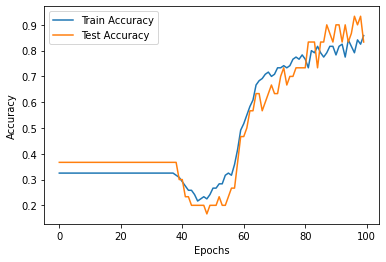

In [19]:
# Plot
#
# Accuracy improves and loss decreases over epochs. The number of 
# Dense units and the activation function in the hidden layer
# is something that could be changed to get better results.
#
# We could also add more hidden layers and change the optimizer, 
# or change the learning rate of the optimizer.
#
# There is a lot of trial and error that happens when training a
# neural network.
plt.plot(model.history.history['accuracy'], label='Train Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.savefig('accuracy_plot.png')
plt.show()

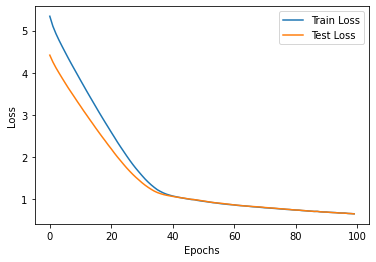

In [20]:
plt.close()
plt.plot(model.history.history['loss'], label='Train Loss')
plt.plot(model.history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# plt.savefig('loss_plot.png')
plt.show()